# A Quick Win: Using Python to Run Statistical Tests and Make Simple Graphs

## In this section

In this section, we will learn how to:

- Use `import` statements to access a wider range of python functions
- Use lists to hold sequences of numbers (or any other python object)
- Make a simple boxplot using the `matplotlib` library
- Make a simple scatterplot using the `matplotlib` library
- Run a Student's t-test or a simple linear regression in python using the `scipy.stats` module


## Prerequisites

- Have Anaconda python installed, and be able to run it
- Understand how to assign varaibles in python (e.g. x = 7)
- Understand how to call functions like `print` in python (e.g. `print("Hello World!")

## A Quick Win - Run Stats Tests and Make Scatterplots in Python

If you're reading the text in order, we've only practiced using a few aspects of python so far: calling functions (like `print()`) and passing them information as arguments (like the stuff inside the parentheses when we write `print("Hello World!")` or `round(10.3,0)`. We've also discussed assigning numbers or strings to variables (`x = 7` or `name="Jesse"`), and doing some basic math (`x_squared = x * x`).

Yet with just a couple of sections under our belt, we are already ready to do some tasks that are genuinely useful in biology research. In this chapter, we'll talk about two of these 'quick wins':  making some simple graphs and running some statistical tests.

### Holding numbers in a list

In order to get our quick wins, we'll have to practice using a python list to hold a series of numbers in order. If you read the `A tour of python data types` chapter, you've seen lists before. Basically they work like a shopping list: they hold items in order. Those items can be anything you can assign to a variable -  strings, numbers, or even other lists.

The syntax for making a list works like this: you start with a square bracket (`[`) then you put your first item, then you put a comma (`,`), and then your second item, and then another comma (`,`). You keep going like that until you've added your last item, and then you put a closing square bracket (`]`). Ready to try? Let's make a list of numbers, and a list of strings:

In [3]:
numbers = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
strings = ["TIR","IL-1R","MyD88"]

So in the first line of that code, we build a list of integers (right hand side of the `=` sign) by putting the numbers in between square brackets and separated by commas. *Then*, we assign that list to the variable `numbers`. So from now on, whenever we refer to `numbers`, python will know we mean the list `[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]`.

In the second line, we do the same thing to make a list of strings, and assign it to a variable called `strings`.

The variables on the left side of the equation can be whatever you want them to be, as long as they are a single word (python doesn't allow variable names to have any spaces in them). If we call them something else, we just have to remember what variable name we used so we can refer to it later.

### Using better variable names

The names we've given the variables (`numbers` and `strings`) aren't very specific - they don't really remind us what these numbers or strings represent.

Let's say that the list of numbers is actually the first few numbers in the Fibbonacci sequence, and that the list of strings actually represents the names of a few genes in innate immunity.

**Try it yourself**: Given this knowledge, try writing the code again, but giving the variables `numbers` and `strings` more specific names. Remember that you can't have spaces in variable names (so a variable named `fibonacci_sequence` is OK, but `fibonacci sequence` is not).

## Importing functions

There's really only one more thing we need to review before we can start running some stats: how to `import` a function. 

Python comes with several useful functions, like `print()` for printing things to the screen or `len()` to test the length of a list or string. But when you installed Anaconda python, you got access to a much wider range of functions that are very useful for bioinformatic work. In order to use these functions we need to `import` them.

Here's an example of how to import a function called `boxplot`:

In [38]:
from matplotlib.pyplot import boxplot

Basically this says go into a package called `matplotlib`, then go into its `pyplot` module, and finally fetch a function called `boxplot` and add it to our current namespace so python will recognize it when we type it.

If everything went well, it will look like nothing happened! But this function is now in our "namespace", meaning if we refer to the function `boxplot` later on in our code python will know what we're talking about - in other words, our `boxplot` function is now ready to go.

## Making a simple boxplot in python

Boxplots are one way to compare differences in a variable across different categories. For example, lets imagine that we are comparing the growth of plants in two plots: one a treatment plot where we added a nutrient we hope will make them grow faster, and another a control plot where we used normal growing conditions. If we measure the height of plants in each plot, we might want a convenient way to show differences in height between the control and treatment plots, as well as how much variation in height there was within each plot. 

To make a boxplot comparing our control vs. treatment data, we'll need to do a few things:
1. import functions for making a boxplot and labelling the x and y axis
2. set up list for the size of plants in the control and treatment plots
3. set up a list of labels for the different columns
4. call our `boxplot` function, passing it our data, and the labels for each column.


OK, let's try making a boxplot from some data we type in by hand! It's going to take about 8 lines of code, but the code will look about twice that long because I've added extra explanations using comments (the lines starting with `#`). You can add or get rid of comment lines without changing what the program does.

Text(0.5, 0, 'Treatment')

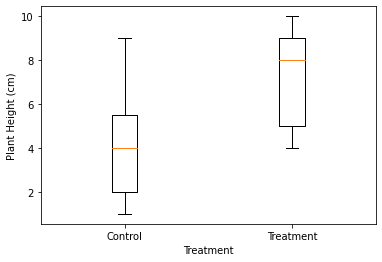

In [39]:
#Import the boxplot function and xlabel and ylabel functions
from matplotlib.pyplot import boxplot, xlabel, ylabel

#Make a list of the size of each control plant in centimeters
control_plant_sizes = [4,7,9,3,4,1,1]

#Make a list of the size of each treatment plant in centimeters
treatment_plant_sizes = [5,4,10,8,5,9,9]

#Put these two lists together into a list of lists so we have two columns of data
data = [control_plant_sizes,treatment_plant_sizes]

#Make a list of strings to represent the labels for each column
treatments = ["Control","Treatment"]

#Draw the boxplot
boxplot(data,labels=treatments)

#Label the y-axis
ylabel("Plant Height (cm)")

#Label the x-axis
xlabel("Treatment")


**Try it yourself**. Try changing the string that we are passing to the xlabel function, and rerun the code. What happens? Are you able to control the x-axis label of the graph? 

**Try it yourself**. Try changing the lists of numbers that are being graphed by modifying the `control_plant_sizes` or `treatment_plant_sizes` variables. By changing these numbers and rerunning the code, you should be able to make a two-category boxplot for any variables you want!

**Try it yourself**. Make up some experimental results. Try writing out two lists of numbers in python (use the way we set up the `control_plant_sizes` and `treatment_plant_sizes` as a guide). Then put them together into a single list (use the way we set up `data` up above as a guide). 

We'll learn much more about how to make improved graphs in the chapter on Data Visualization. For right now though, it's nice to be able to make some basic graphs inside python!

### Running a t-test in python

In statistics, a t-test for independence is used to test whether two sets of numbers are significantly different. In our plant data, even if our nutrient in the Treatment plot did nothing, we might expect *some* differences between our plots just by chance (plants never grow at precisely the same rate). Our t-test will help us tell if the differences we see between the plots are too large to be easily explained by chance. 

To run our t-test, we'll need to do three things:
1. import our ttest_ind function
2. set up lists for the size of plants in the control and treatment plots
3. call our ttest_ind function, passing it these two lists as arguments.

Here's how that would look:

In [40]:
#In the scipy package, find the stats module, and import the ttest_ind function from it
from scipy.stats import ttest_ind

#Make a list of the size of each control plant in centimeters
control_plant_sizes = [4,7,9,3,4,1,1]

#Make a list of the size of each treatment plant in centimeters
treatment_plant_sizes = [5,4,10,8,5,9,9]

#Run a t-test on the results
ttest_ind(control_plant_sizes,treatment_plant_sizes)

Ttest_indResult(statistic=-2.075920579904651, pvalue=0.06005528193405867)

This produces two numbers: a **T statistic**, representing how different our plant sizes are between treatments, and a **p-value**, representing the chances of getting that big of a difference coincidentally if our treatment wasn't actually doing anything.

Even though the plants in our treatment plot grew bigger on average (as we showed in our box plot), this t-test result is telling us that the difference could fairly easily just be due to chance. Since **p** is about 0.06, that means that there is about a 6% chance that this result could be coincidence. Traditionally, differences with a less than 5% chance of occuring by chance are said to be statistically significant. So our difference in this example is not statistically significant - a useful thing to know! 

We will discuss statistics like the t-test in much greater depth later in the text.

### Make a simple scatterplot in matplotlib


Male frogs often make loud calls to attract mates. Let's say we were researching frog calls, and wanted to test if larger frogs made longer calls. Let's say  we measured the size and call length of several frogs. We now want to make a graph to show the relationship between the size of the frog, and the length of its call.  Since both the size of frogs and the length of their calls are continuous (rather than categories) variables, a boxplot wouldn't make much sense. Instead, a scatterplot could be a nice way to vizualize this data.

Just like with out boxplot, we will have to import a few functions from `matplotlib.pyplot` that we will need to make our graph. `scatter` is the function for making the scatterplot, while `xlabel` and `ylabel` are functions for setting the x and y axis labels.

Text(0, 0.5, 'Call Length')

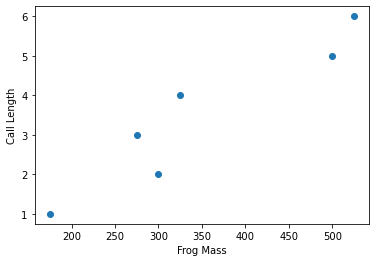

In [41]:
from matplotlib.pyplot import scatter, xlabel, ylabel

scatter(frog_sizes,frog_call_lengths)
xlabel("Frog Mass")
ylabel("Call Length")

## Running a simple linear regression in python

There are many statistical tests available in the `scipy.stats` module where we got our t-test function. For example, the function `pearsonr` will perform a Pearson regression. This take two lists of numbers, and tests whether the values of the first list are correlated with the corresponding values in the second list. So while t-tests are useful in comparing values across a category, a Pearson regression is useful in comparing two continuous variables against each other.

Since we have some data on the size of our frogs, and the length of their calls, we could use a Pearson regression to test if bigger frogs made longer calls. 

Here's a complete example:

In [42]:
#Import the pearsonr function 
from scipy.stats import pearsonr

#Make a list of frog sizes in grams
frog_sizes = [175,500,300,325,275,525]

#Make a list of the call lengths of those same frongs, in seconds
frog_call_lengths = [1,5,2,4,3,6]

#Run pearson regression, and assign the results to the variables R2 and pvalue
R2, pvalue = pearsonr(frog_sizes,frog_call_lengths)

#Print the results
print("R2:",R2)
print("pvalue:",pvalue)

R2: 0.943172990270231
pvalue: 0.004752207564269603


The Pearson regression produces two values. The R-squared (R2) value represents the proportion of the variation in the y variable that is explained by the value of the x variable. So in this case, 94% of the variation in the length of frog calls can be explained by variation in frog size.

Just as in the t-test, in Pearson regression the p-value represents the chances of getting this strong of a pattern by chance. In the case of Pearson regression 'by chance' means under the null hypothesis of a flat relationship between the x and y variables (i.e. increasing x does not increase y on average).  In our case we get a p-value of 0.00475. This means it would be very rare — only an about 0.4% chance — to get this strong of a correlation by chance, if in truth there was no relationship between frog size and call length. Because 0.4% is less than 5%, this means that the relationship between frog size and frog call length we found would  be considered statistically significant.

## Exercises

1. **Picking a graph to show the effects of a drug vs. a placebo**. Imagine that you are comparing the white blood cell count of two groups of patients: one who was given an experimental drug, and a control group that was given a placebo. Which type of graph do you think would be better to show this data, a boxplot, or a scatterplot? Why?

2. **Testing whether older tigers have bigger territories**. Imagine that you were collecting data on tigers, and trying to test whether older tigers had larger territories than younger tigers. To test whether the age of the tigers was associated with the area of their territory, do you think it would be better to use a t-test for independence, or a Pearson regression? Why?

3. **Make a Boxplot of frog call Length during rainy or clear Weather**. You are studying the mating calls of frogs, and want to graph some data you've collected. Male frogs often make loud calls to attract mates. Imagine that you measured the length of frog calls when it was raining vs. when it was not raining, and wanted to undertand if rain was associated with longer calls. Let's further assume that the call times you measured were: 

During rain: 3 seconds, 3 seconds, 2 seconds, 4 seconds, 5 seconds
No rain: 1 second, 1 second, 1 second, 2 seconds, 1 second

Make a boxplot of this data. *Hint*: you can basically reuse the code from the text, just changing the numbers and labels.

4. **Use a t-test to see if frog calls are longer when it is raining**. Using the data from the above exercise, run a t-test for independence to test whether there is a significant difference in frog call length based on whether it's raining or not.

5. **Three or more category boxplot**. Make up an imaginary dataset with three or more categories. Then try changing the boxplot code to graph all of them at once. *Hint* you'll want to make a list of numbers to represent the data for each category, and assign each list to a variable. Then, you'll want to combine those variables into a single 'data' list, like we combined our control and treatment plant heights in the boxplot example. Finally, you'll want to make sure that you pass in three strings instead of two for your column labels. 

## Reading Responses & Feedback 

^Make this a hyperlink using Google Forms

## Further Reading

## References